In this example, the data is already collected, so we can move on to testing for stationarity. As mentioned previously, the presence of a trend over time means that our series is likely not stationary, so we will have to apply a transformation in order to make it stationary. Then we will plot the ACF. As we work through the chapter, you will see that not only is there autocorrelation, but the ACF plot will have a slowly decaying trend.

This is indicative of an autoregressive process of order p, also denoted as AR(p). In this case, we must plot the partial autocorrelation function (PACF) to find the order p. Just like the coefficients on an ACF plot for an MA(q) process, the coefficients on the PACF plot will become abruptly non-significant after lag p, hence determining the order of the autoregressive process.

Again, the order of the autoregressive process determines how many parameters must be included in the AR(p) model. Then we will be ready to make forecasts. In this example, we wish to forecast next week’s average foot traffic.

## 5.1 Predicting the average weekly foot traffic in a retail store

Suppose that you want to forecast the average weekly foot traffic in a retail store so that the store manager can better manage the staff’s schedule. If many people are expected to come to the store, more employees should be present to provide assistance. If fewer people are expected to visit the store, the manager can schedule fewer employees to work. That way the store can optimize its spending on salaries and ensure that employees are not overwhelmed or underwhelmed by store visitors.

For this example, we have 1,000 data points, each representing the average weekly foot traffic at a retail store starting in the year 2000. You can see the evolution of our data through time in figure.

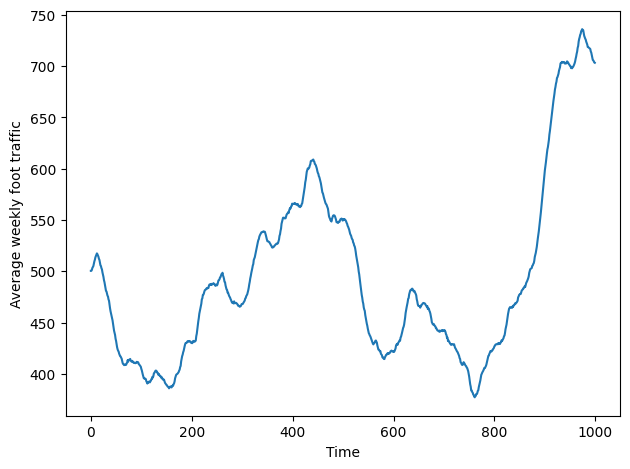

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./foot_traffic.csv')
df.head()

fig, ax = plt.subplots()

ax.plot(df['foot_traffic'])
ax.set_xlabel('Time')
ax.set_ylabel('Average weekly foot traffic')

plt.tight_layout()

In figure we can see a long-term trend with peaks and troughs along the way. We can intuitively say that this time series is not a stationary process, since we observe a trend over time. Furthermore, there is no apparent cyclical pattern in the data, so we can rule out any seasonal effects for now.

Again, in order to forecast the average weekly foot traffic, we need to identify the underlying process. Thus, we must apply the same steps that we covered in chapter 4. That way, we can verify whether we have a random walk or a moving average process at play.

## 5.2 Defining the autoregressive process

An autoregressive process establishes that the output variable depends linearly on its own previous values. In other words, it is a regression of the variable against itself.

An autoregressive process is denoted as an AR(p) process, where p is the order. In such a process, the present value yt is a linear combination of a constant C, the present error term ϵt, which is also white noise, and the past values of the series yt–p. The magnitude of the influence of the past values on the present value is denoted as φp, which represents the coefficients of the AR(p) model. Mathematically, we express a general AR(p) model with equation
<br/>
<center>$y_t = C + \Phi_1 y_{t-1} + \Phi_2 y_{t-2} + ... + \Phi_p y_{t-p} + \epsilon_t$</center>

Similar to the moving average process, the order p of an autoregressive process determines the number of past values that affect the present value. If we have a first-order autoregressive process, also denoted as AR(1), then the present value $y_t$ is only dependent
on a constant C, the value at the previous timestep $\Phi_1 y_{t-1}$, and some white noise $\epsilon_t$, as shown in equation
<br/>
<center>$y_t = C + \Phi_1 y_{t-1} + \epsilon_1$</center>

Looking at equation, you might notice that it is very similar to a random walk process, which we covered in chapter 3. In fact, if $\Phi_1 = 1$, then equation becomes
<br/>
<center>$y_t = C + y_{t-1} + \epsilon_1$</center>

which is our random walk model. Therefore, we can say that the random walk is a special case of an autoregressive process, where the order p is 1 and $\Phi_1$ is equal to 1.

Notice also that if C is not equal to 0, then we have a random walk with drift.

As with a moving average process, we must find the right order of an autoregressive process in order to build the appropriate model. This means that if we identify an AR(3) process, we will use a third-order autoregressive model to make forecasts.

<center><img src="https://i.imgur.com/MzDNG8y.png" alt="Steps to recognize an AR(q) process" title="Steps to recognize an AR(q) process" /></center>

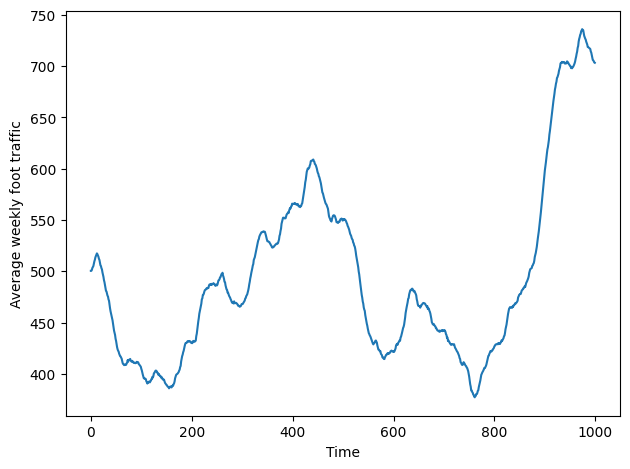

In [6]:
fig, ax = plt.subplots()

ax.plot(df['foot_traffic'])
ax.set_xlabel('Time')
ax.set_ylabel('Average weekly foot traffic')

plt.tight_layout()

Looking at figure, you’ll notice that there is no cyclical pattern, so we can rule out the presence of seasonality. As for the trend, it is sometimes positive and sometimes negative throughout the years, with the most recent trend being positive, since 2016.

The next step is to check for stationarity. As mentioned before, the presence of a trend means that our series is likely non-stationary. Let’s verify that using the ADF test.

In [7]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(df['foot_traffic'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.1758885999240747
p-value: 0.683880891789619


This prints out an ADF statistic of –1.18 along with a p-value of 0.68. Since the ADF statistic is not a large negative number, and it has a p-value greater than 0.05, we cannot reject the null hypothesis and our series is therefore non-stationary.

Hence, we must apply a transformation to make it stationary. To remove the effect of the trend and stabilize the mean of the series, we will use differencing.

In [8]:
import numpy as np

foot_traffic_diff = np.diff(df['foot_traffic'], n=1)

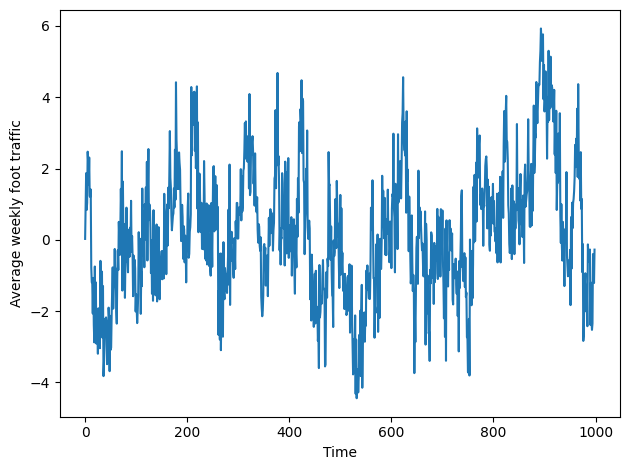

In [9]:
fig, ax = plt.subplots()

ax.plot(foot_traffic_diff)
ax.set_xlabel('Time')
ax.set_ylabel('Average weekly foot traffic')

plt.tight_layout()

With a transformation applied to the series, we can verify whether the series is stationary by running the ADF test on the differenced series.

In [10]:
ADF_result = adfuller(foot_traffic_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -5.268231347422044
p-value: 6.369317654781239e-06


This prints out an ADF statistic of –5.27 and a p-value of 6.36×10–6. With a p-value smaller than 0.05, we can reject the null hypothesis, meaning that we now have a stationary series.

The next step is to plot the ACF and see if there is autocorrelation and if the coefficients become abruptly non-significant after a certain lag. As we did in the two previous chapters, we will use the plot_acf function from statsmodels.

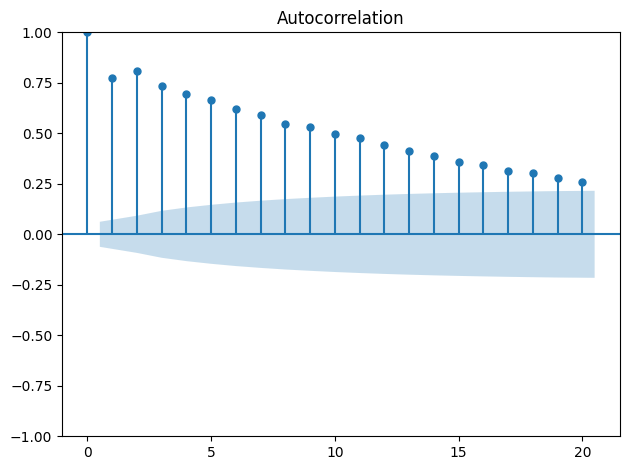

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(foot_traffic_diff, lags=20);

plt.tight_layout()

Looking at figure 5.6, you’ll notice that we have significant autocorrelation coefficients beyond lag 0. Therefore, we know that our process is not a random walk. Furthermore, you’ll notice that the coefficients are decaying exponentially as the lag increases. TTherefore, there is no lag at which the coefficients abruptly become nonsignificant. This means that we do not have a moving average process and that we are likely studying an autoregressive process.

When the ACF plot of a stationary process exhibits a pattern of exponential decay, we probably have an autoregressive process in play, and we must find another way to identify the order p of the AR(p) process. Specifically, we must turn our attention to the partial autocorrelation function (PACF) plot.

### 5.3.1 The partial autocorrelation function (PACF)

In an attempt to identify the order of a stationary autoregressive process, we used the ACF plot just as we did for a moving average process. Unfortunately, the ACF plot cannot give us this information, and we must turn to the partial autocorrelation function (PACF).

Remember that the autocorrelation measures the linear relationship between lagged values of a time series. Consequently, the autocorrelation function measures how the correlation changes between two values as the lag is increased.

To understand the partial autocorrelation function, let’s consider the following scenario. Suppose we have the following AR(2) process:
<br/>
<center>$y_t = 0.33y_{t-1} + 0.50y_{t-2}$</center>

We wish to measure how $y_$ relates to $y_{t-2}$; in other words, we want to measure their correlation. This is done with the autocorrelation function (ACF). However, from the equation, we can see that yt –1 also has an influence on yt. Even more important, it also has an impact on the value of $y_{t-2}$, since in an AR(2) process, each value depends on the previous two values. Therefore, when we measure the autocorrelation between $y_t$ and $y_{t-2}$ using the ACF, we are not taking into account the fact that $y_{t-1}$ has an influence on both $y_t$ and $y_{t-2}$. This means that we are not measuring the true impact of $y_{t-2}$ on $y_t$. To do so, we must remove the effect of $y_{t-1}$. Thus, we are measuring the partial autocorrelation between $y_t$ and $y_{t-2}$.

In more formal terms, the partial autocorrelation measures the correlation between lagged values in a time series when we remove the influence of correlated lagged values in between. Those are known as confounding variables. The partial autocorrelation function will reveal how the partial autocorrelation varies when the lag increases.

Let’s verify whether plotting the PACF will reveal the order of the process shown. We know from equation 5.4 that we have a second-order autoregressive process, or AR(2). We will simulate it using the ArmaProcess function from statsmodels. The function expects an array containing the coefficients of an MA(q) process and an array containing the coefficients for an AR(p) process. Since we are only interested in simulating an AR(2) process, we will set the coefficients of the MA(q) process to 0. Then, as specified by the statsmodels documentation, the coefficients of the AR(2) process must have opposite signs to those we wish to simulate. Therefore, the array will contain –0.33 and –0.50. In addition, the function requires us to include the coefficient at lag 0, which is the number that multiplies $y_t$. Here, that number is simply 1.

Once the arrays of coefficients are defined, we can feed them to the ArmaProcess function, and we will generate 1,000 samples. Make sure you set the random seed to 42 in order to reproduce the results shown here.

In [12]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(42)

ma2 = np.array([1, 0, 0])
ar2 = np.array([1, -0.33, -0.50])

AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

Now that we have a simulated AR(2) process, let’s plot the PACF and see if the coefficients become abruptly non-significant after lag 2. If that is the case, we’ll know that we can use the PACF plot to determine the order of a stationary autoregressive process, just as we can use the ACF plot to determine the order of a stationary moving average process.

The statsmodels library allows us to plot the PACF rapidly. We can use the plot_pacf function, which simply requires our series and the number of lags to display on the plot.

/home/sandra/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


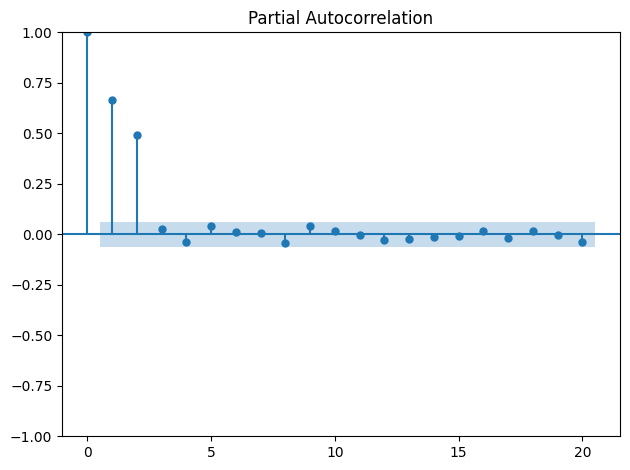

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(AR2_process, lags=20);

plt.tight_layout()

We now know that we can use the PACF plot to identify the order of a stationary AR(p) process. The coefficients in the PACF plot will be significant up until lag p. Afterward, they should not be significantly different from 0.

Let’s see if we can apply the same strategy to our average weekly foot traffic dataset. We made the series stationary and saw that the ACF plot exhibited a slowly decaying trend. Let’s plot the PACF to see if the lags become non-significant after a particular lag.

The process is exactly the same as what we just did, but this time we will plot the PACF of our differenced series stored in foot_traffic_diff.

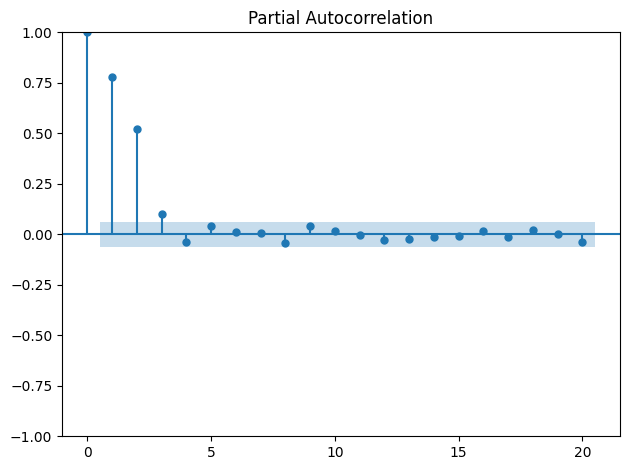

In [14]:
plot_pacf(foot_traffic_diff, lags=20);

plt.tight_layout()

Looking at figure you can see that there are no significant coefficients after lag 3. Therefore, the differenced average weekly foot traffic is an autoregressive process of order 3, which can also be denoted as AR(3).

## 5.4 Forecasting an autoregressive process

Once the order is determined, we can fit an autoregressive model to forecast our time series. In this case, the model is also termed AR(p), where p is still the order of the process.

We will forecast next week’s average foot traffic in a retail store using the same dataset we have been working with. In order to evaluate our forecasts, we will hold out the last 52 weeks of data for our test set, while the rest will be used for training. That way, we can evaluate the performance of our forecast over a period of 1 year.

In [15]:
df_diff = pd.DataFrame({'foot_traffic_diff': foot_traffic_diff})

train = df_diff[:-52]
test = df_diff[-52:]

print(len(train))
print(len(test))

947
52


You can see that our training set contains 947 data points, while the test set contains 52 data points as expected. Note that the sum of both sets gives 999, which is one less data point than our original series. This is normal, since we applied differencing to make the series stationary, and we know that differencing removes the first data point from the series.

Next, we will visualize the testing period for our scenario, in both the original series and the differenced series.

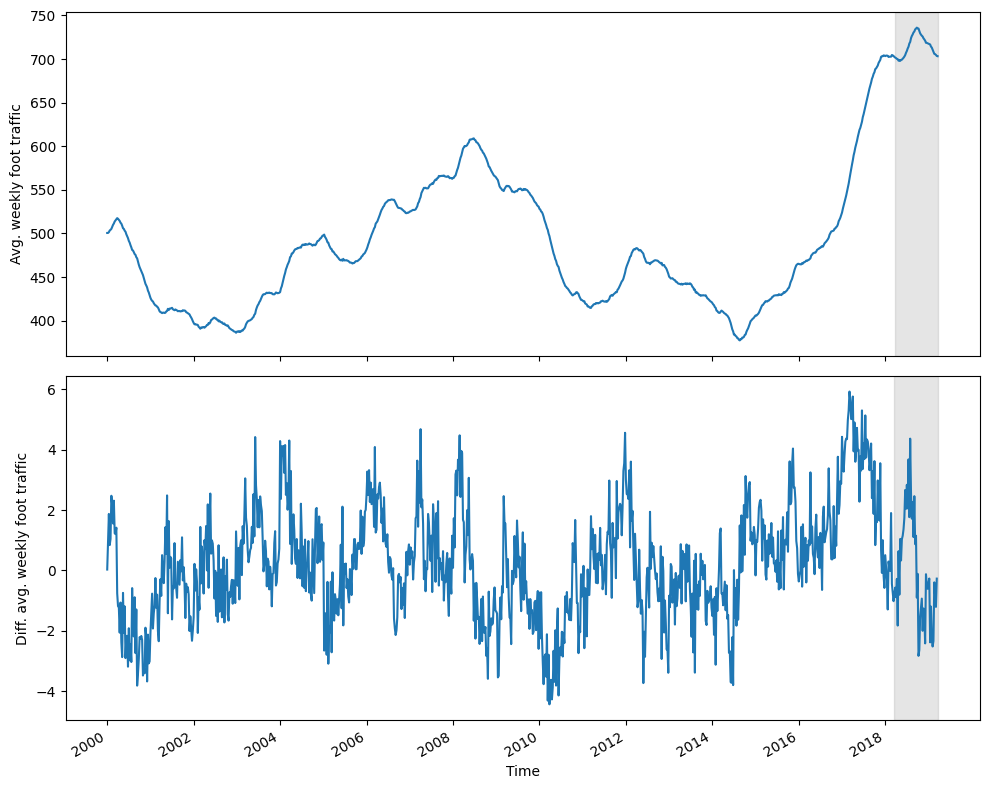

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))

ax1.plot(df['foot_traffic'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Avg. weekly foot traffic')
ax1.axvspan(948, 1000, color='#808080', alpha=0.2)

ax2.plot(df_diff['foot_traffic_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Diff. avg. weekly foot traffic')
ax2.axvspan(947, 999, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2))

fig.autofmt_xdate()
plt.tight_layout()

Given that our objective is to forecast next week’s average foot traffic at the retail store, we will perform rolling forecasts over our test set. Remember that our data was recorded over a weekly period, so predicting the next timestep means we’re forecasting next week’s average foot traffic.

We will forecast using three different methods. The historical mean method and the last known value method will act as baselines, and we will use an AR(3) model, since we previously established that we have a stationary third-order autoregressive process. As we did in the previous chapter, we will use the mean squared error (MSE) to evaluate the performance of each forecasting method.

Also, we will reuse the function we defined in the previous chapter to recursively forecast over the testing period. However, this time we must include a method to use an autoregressive model.

We will again use the SARIMAX function from statsmodels, as it encompasses an AR model. As mentioned previously, SARIMAX is a complex model that allows us to consider seasonal effects, autoregressive processes, non-stationary time series, moving average processes, and exogenous variables all in one single model. For now, we will disregard all factors except the moving autoregressive portion.

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon
    end_idx = train_len

    if method == 'mean':
        pred_mean = []

        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    elif method == 'last':
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    elif method == 'AR':
        pred_AR = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(3,0,0))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_AR.extend(oos_pred)

        return pred_AR

Once our function is defined, we can use it to generate the predictions according to each method. We will assign them to their own column in test.

In [18]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 1

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_AR = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'AR')

test['pred_mean'] = pred_mean
test['pred_last_value'] = pred_last_value
test['pred_AR'] = pred_AR

test.head()

/tmp/ipykernel_926959/2144910225.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_mean'] = pred_mean
/tmp/ipykernel_926959/2144910225.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_last_value'] = pred_last_value
/tmp/ipykernel_926959/2144910225.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,foot_traffic_diff,pred_mean,pred_last_value,pred_AR
947,-0.776601,0.213270,-1.021893,-0.719714
948,-0.574631,0.212226,-0.776601,-0.814547
949,-0.890697,0.211397,-0.574631,-0.664738
950,-0.283552,0.210237,-0.890697,-0.641469
951,-1.830685,0.209717,-0.283552,-0.579279


We can now visualize our predictions against the observed values in the test set. Note that we are working with the differenced series, so our predictions are also differenced values

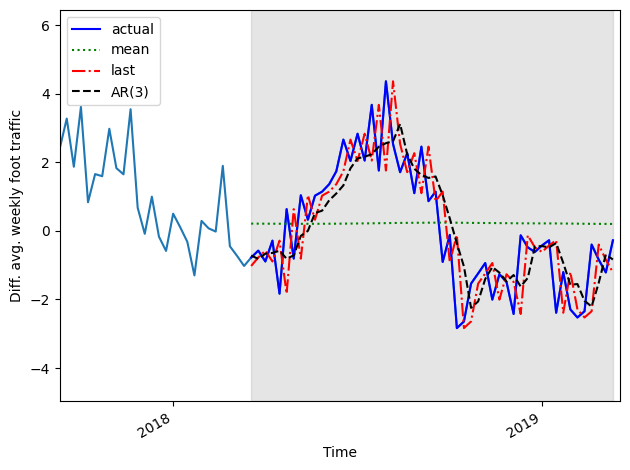

In [19]:
fig, ax = plt.subplots()

ax.plot(df_diff['foot_traffic_diff'])
ax.plot(test['foot_traffic_diff'], 'b-', label='actual')
ax.plot(test['pred_mean'], 'g:', label='mean')
ax.plot(test['pred_last_value'], 'r-.', label='last')
ax.plot(test['pred_AR'], 'k--', label='AR(3)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Diff. avg. weekly foot traffic')

ax.axvspan(947, 998, color='#808080', alpha=0.2)

ax.set_xlim(920, 999)

plt.xticks([936, 988],[2018, 2019])

fig.autofmt_xdate()
plt.tight_layout()

Looking at figure 5.10, you’ll see that, once again, using the historical mean produces a straight line, which is shown in the plot as a dotted line. As for the predictions from the AR(3) model and the last known value method, the curves are almost confounding with that of the test set, so we will have to measure the MSE to assess which method is the most performant. Again, we will use the mean_squared_error function from the sklearn library.

In [20]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['foot_traffic_diff'], test['pred_mean'])
mse_last = mean_squared_error(test['foot_traffic_diff'], test['pred_last_value'])
mse_AR = mean_squared_error(test['foot_traffic_diff'], test['pred_AR'])

print(mse_mean, mse_last, mse_AR)

3.1079979374701447 1.448730118495964 0.9242479164643418


This prints out an MSE of 3.11 for the historical mean method, 1.45 for the last known value method, and 0.92 for the AR(3) model. Since the MSE for the AR(3) model is the lowest of the three, we conclude that the AR(3) model is the best-performing method for forecasting next week’s average foot traffic. This is expected, since we established that our stationary process was a third-order autoregressive process. It makes sense that modeling using an AR(3) model will yield the best predictions.

Since our forecasts are differenced values, we need to reverse the transformation in order to bring our forecasts back to the original scale of the data; otherwise, our predictions will not make sense in a business context. To do this, we can take the cumulative sum of our predictions and add it to the last value of our training set in the original series. This point occurs at index 948, since we are forecasting the last 52 weeks in a dataset containing 1,000 points.

In [21]:
df['pred_foot_traffic'] = pd.Series()
df['pred_foot_traffic'][948:] = df['foot_traffic'].iloc[948] + test['pred_AR'].cumsum()

/tmp/ipykernel_926959/2750837961.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['pred_foot_traffic'] = pd.Series()


Now we can plot our undifferenced predictions against the observed values in the test set of the original series in its original scale.

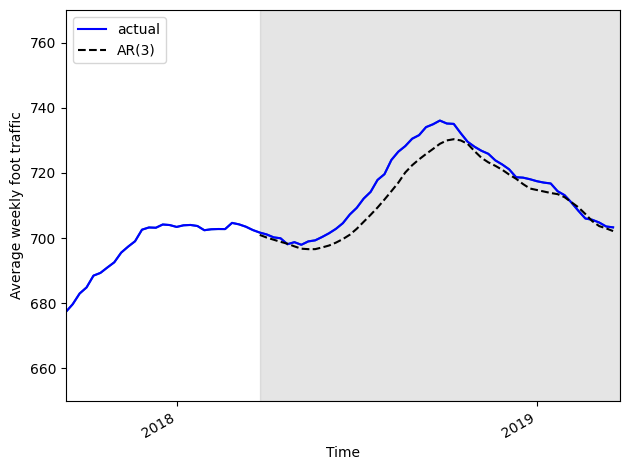

In [22]:
fig, ax = plt.subplots()

ax.plot(df['foot_traffic'])
ax.plot(df['foot_traffic'], 'b-', label='actual')
ax.plot(df['pred_foot_traffic'], 'k--', label='AR(3)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Average weekly foot traffic')

ax.axvspan(948, 1000, color='#808080', alpha=0.2)
ax.set_xlim(920, 1000)
ax.set_ylim(650, 770)

plt.xticks([936, 988],[2018, 2019])

fig.autofmt_xdate()
plt.tight_layout()

Now we can measure the mean absolute error (MAE) on the original dataset to get its meaning in a business context. We’ll simply measure the MAE using the undifferenced predictions.

In [23]:
from sklearn.metrics import mean_absolute_error

mae_AR_undiff = mean_absolute_error(df['foot_traffic'][948:], df['pred_foot_traffic'][948:])
print(mae_AR_undiff)

3.4780335575911225


This prints out a mean absolute error of 3.45. This means that our predictions are off by 3.45 people on average, either above or below the actual value for the week’s foot traffic. Note that we report the MAE because it has a simple business meaning that is easy to understand and interpret.